In [1]:
# on appelle les libraires
import numpy as np 
import pandas as pd 
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/flora_000/Desktop/ENSAE/Projet Python/Data")
os.getcwd()

'C:\\Users\\flora_000\\Desktop\\ENSAE\\Projet Python\\Data'

In [6]:
# on importe la base de donnée finale
data0= pd.read_csv('data_2000_20_12_17.csv',delimiter=',',low_memory=False)
# on filtre sur le cancer des poumons 
data_c34 = data0[data0['Cancer_code'] == "C33,C34"]
# export du dataframe pour ne pas devoir réimporter la base avec tous les cancers à chaque fois
data_c34.to_csv('data.csv')

In [2]:
# on importe la base de donnée finale
data= pd.read_csv('data.csv',delimiter=',',low_memory=False)
data.describe()
print(data.shape)
data.head()

(37264, 58)


,Unnamed: 0,Unnamed: 0.1,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
0,14648,42136,"C33,C34",1,2,Antigua and Barbuda,2000,0,Antigua and Barbuda,2,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
1,14663,42151,"C33,C34",1,3,Antigua and Barbuda,2000,0,Antigua and Barbuda,3,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
2,14679,42167,"C33,C34",2,3,Antigua and Barbuda,2000,0,Antigua and Barbuda,3,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
3,14694,42182,"C33,C34",1,1,Antigua and Barbuda,2000,0,Antigua and Barbuda,1,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
4,14708,42196,"C33,C34",1,6,Antigua and Barbuda,2000,0,Antigua and Barbuda,6,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065


#  Méthode Bagging : ici, nous allons voir l'algorithme de forêt aléatoire pour une classification et pour une régression.

# Forêts alétoires Régression 

L’algorithme d’agrégation de modèles le plus utilisé est celui des forêts aléatoires (bagging), ce qui ne signifie 
pas qu’il conduit toujours à la meilleure prévision. L'objectif de la forêt aléatoire est de réduire le rique de sur-apprentissage (en comparaison de l'arbre de décision).

Plus que le nombre d’arbres n_estimators, le paramètre à optimiser est le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud : max_features. Par défaut, il prend la valeur p/3 en pour la régression et √p pour la classification. 

In [19]:
# variable à expliquer
Y= data[["Mortality_rate"]] 
Y.mean()
# variables explicatives
X= data[["Sex","Age_bucket","Year","Country", "SP.URB.TOTL.IN.ZS","SP.URB.GROW","SP.POP.GROW","SE.PRM.DURS",
"AG.SRF.TOTL.K2","SE.PRE.DURS","EN.POP.DNST","SE.SEC.DURS","SP.DYN.CBRT.IN","SP.DYN.CDRT.IN",
"NY.ADJ.AEDU.GN.ZS", "SP.DYN.TFRT.IN", "SP.ADO.TFRT", "SP.DYN.LE00.FE.IN", "SP.DYN.LE00.IN",
"SP.POP.DPND","SP.DYN.AMRT.FE","SP.DYN.AMRT.MA","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE",
"AG.LND.AGRI.K2", "EN.ATM.GHGO.KT.CE","AG.LND.AGRI.ZS","AG.PRD.FOOD.XD","IT.CEL.SETS",
"AG.PRD.LVSK.XD","AG.PRD.CROP.XD","IT.MLT.MAIN","EN.ATM.GHGT.KT.CE","EN.ATM.CO2E.GF.ZS",
"EN.ATM.CO2E.LF.ZS","EN.ATM.CO2E.SF.ZS","NY.GDP.FRST.RT.ZS","NY.GDP.MINR.RT.ZS","EN.ATM.CO2E.LF.KT",
"EN.ATM.METH.AG.KT.CE","EN.ATM.METH.EG.KT.CE","EN.ATM.NOXE.AG.KT.CE", "EN.ATM.NOXE.EG.KT.CE",
"NY.GDP.TOTL.RT.ZS", "EN.ATM.CO2E.KT","EN.ATM.CO2E.PC","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD"]] 

# On transforme les variables sous forme de chaînes de caractères en variables binaires :
 # Ici, seul la variable country est concernée
X2 = X.T.to_dict().values()
from sklearn.feature_extraction import DictVectorizer
prep = DictVectorizer()
X3 = prep.fit_transform(X2).toarray()

# on constitut nos deux échantillons "train" et "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.3)

Nous allons calculer le RMSE du modèle en faisant varier les paramètres suivants :
- n_estimators :  Le nombre d'arbres dans la forêt. (par défaut = 10)
- max_depth : La profondeur maximale de l'arbre. (par défaut = None)
- max_features : le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

n_estimators 1 erreur 103.528680035 104.457091992
n_estimators 2 erreur 103.54088299 104.416993603
n_estimators 3 erreur 103.523795111 104.440222391
n_estimators 4 erreur 103.537043012 104.463766744
n_estimators 5 erreur 103.536598742 104.416628854
n_estimators 6 erreur 103.519597785 104.427588409
n_estimators 7 erreur 103.525907929 104.449461241
n_estimators 8 erreur 103.520669666 104.430698914
n_estimators 9 erreur 103.522274372 104.439741502
n_estimators 10 erreur 103.520312033 104.421391406
n_estimators 11 erreur 103.527494698 104.452069318
n_estimators 12 erreur 103.520213099 104.423817951
n_estimators 13 erreur 103.519708909 104.42433395
n_estimators 14 erreur 103.520010765 104.422460713
n_estimators 15 erreur 103.524810246 104.445328909
n_estimators 16 erreur 103.519665684 104.426843656
n_estimators 17 erreur 103.519701939 104.426778059
n_estimators 18 erreur 103.519799566 104.429724395
n_estimators 19 erreur 103.520770277 104.420445955


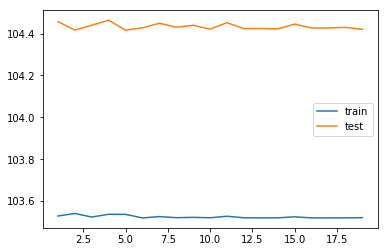

In [6]:
# on fait varier le nombre d'arbre dans la forêt.
curves = []
for n_estimators in range(1,20) :
    
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=n_estimators,max_depth=1)
    # apprentissage
    clf = clf.fit(X_train, Y_train["Mortality_rate"].ravel())
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("n_estimators",n_estimators, "erreur", err_train, err_test)
    curves.append((n_estimators,  err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# Le modèle ne varie pas en fonction de ce paramètre, on choisit de garder la valeur par défaut n_estimators = 10

max_depth 1 erreur 103.520357091 104.421363462
max_depth 2 erreur 84.7966641704 84.5510163819
max_depth 3 erreur 65.0642808169 66.2585367536
max_depth 4 erreur 53.451750182 56.7015327354
max_depth 5 erreur 45.4992523121 49.6176612327
max_depth 6 erreur 36.6844906513 42.4320297815
max_depth 7 erreur 31.0473107445 37.4432375301
max_depth 8 erreur 25.7559508896 33.7084384382
max_depth 9 erreur 22.088825229 32.098647184
max_depth 10 erreur 19.1024502788 31.3261471262
max_depth 11 erreur 17.378541887 30.5611686437
max_depth 12 erreur 15.7684017271 30.2966359326
max_depth 13 erreur 14.4586537829 29.4356456144
max_depth 14 erreur 14.5583061702 29.6814401395
max_depth 15 erreur 13.6165338355 29.6729617871
max_depth 16 erreur 13.0685767987 30.7126638359
max_depth 17 erreur 13.505070495 29.8349235521
max_depth 18 erreur 12.8438898885 30.2302680758
max_depth 19 erreur 13.0206914583 29.6140669084
max_depth 20 erreur 13.2582837081 29.6922016189
max_depth 21 erreur 12.5625183383 30.1617372701
max_de

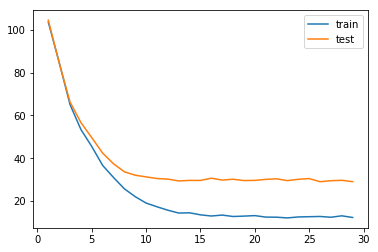

In [7]:
# on fait varier a profondeur maximale de l'arbre.
curves = []
for max_depth in range(1,30) :
  
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=10,max_depth=max_depth)
    # apprentissage
    clf = clf.fit(X_train, Y_train["Mortality_rate"].ravel())
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("max_depth",max_depth, "erreur", err_train, err_test)
    curves.append((max_depth,  err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on choisit max_depth = 15

max_features 30 erreur 20.1732129947 36.6549581429
max_features 31 erreur 18.6761855562 35.2317778065
max_features 32 erreur 19.7820135958 36.3069358597
max_features 33 erreur 18.3792191888 34.9301324493
max_features 34 erreur 18.6231687675 35.5434190646
max_features 35 erreur 17.5301470018 33.6385395169
max_features 36 erreur 20.5977964253 35.6651729814
max_features 37 erreur 17.6637183577 34.300295384
max_features 38 erreur 17.7130666199 34.0842167994
max_features 39 erreur 17.3446932171 34.7545696777
max_features 40 erreur 15.5403397192 31.9946785002
max_features 41 erreur 16.6880843787 34.1033204229
max_features 42 erreur 14.9075825857 31.8541823875
max_features 43 erreur 15.0224941698 31.2072690894
max_features 44 erreur 15.3441130481 31.8143869362
max_features 45 erreur 14.8315811757 31.0503356217
max_features 46 erreur 14.1818595419 30.1444954605
max_features 47 erreur 15.2109211519 31.2411381429
max_features 48 erreur 15.2099245874 31.7568934299
max_features 49 erreur 15.294385

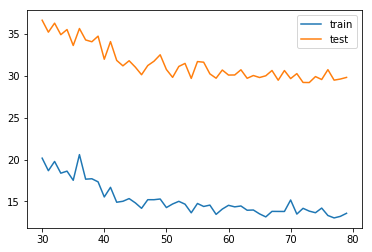

In [8]:
# on fait varier le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud.
curves = []
for max_features in range(30,80) :
    
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=10,max_depth=15,max_features=max_features)
    # apprentissage
    clf = clf.fit(X_train, Y_train["Mortality_rate"].ravel())
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("max_features",max_features, "erreur", err_train, err_test)
    curves.append((max_features, err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on garde max_features = 80

In [21]:
%%time
# le modèle final est le suivant :
RF = RandomForestRegressor(n_estimators=10,max_depth=15,max_features=80)
RF = RF.fit(X_train, Y_train["Mortality_rate"].ravel())
# prédiction
Y_pred_train = RF.predict(X_train)
Y_pred_test  = RF.predict(X_test)
# RMSE
err_train = metrics.mean_squared_error(Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error(Y_pred_test, Y_test)**0.5
print("RMSE_train", err_train)
print("RMSE_test", err_test)
# R2
R2_train = RF.score(X_train , Y_train)
R2_test = RF.score(X_test, Y_test)
print("R2_train",R2_train)
print("R2_test",R2_test)

RMSE_train 13.542139852
RMSE_test 30.7127202999
R2_train 0.989396010556
R2_test 0.948283340463
Wall time: 3.56 s


In [30]:
# résultat sut la base de test

# taux de mortalité observé
print("Minimum de la base test :", Y_test.min())
print("Maximum de la base test :", Y_test.max())
print("Moyenne de la base test :", Y_test.mean())
print("Médiane de la base test :", Y_test.median())
print("Ecart-type de la base test :", Y_test.std())

# taux de mortalité prédit
print("Minimum de la base test :", Y_pred_test.min())
print("Maximum de la base test :", Y_pred_test.max())
print("Moyenne de la base test :", Y_pred_test.mean())
print("Médiane de la base test :", np.median(Y_pred_test))
print("Ecart-type de la base test :", Y_pred_test.std())

Minimum de la base test : Mortality_rate    0.0
dtype: float64
Maximum de la base test : Mortality_rate    1308.182006
dtype: float64
Moyenne de la base test : Mortality_rate    52.134541
dtype: float64
Médiane de la base test : Mortality_rate    1.307985
dtype: float64
Ecart-type de la base test : Mortality_rate    135.058672
dtype: float64
Minimum de la base test : 0.0
Maximum de la base test : 1254.27731208
Moyenne de la base test : 52.2039461094
Médiane de la base test : 2.17981132431
Ecart-type de la base test : 131.451053107


A présent, nous utilisons une méthode automatique de recherche des paramètres pour comparer les résultats.

In [ ]:
#outil grille de recherche
from sklearn.grid_search import GridSearchCV

#combinaisons de paramètres à tester : Scikit-learn va évaluer toutes les combinaisons
# comme le modèle ne varie pas en fonction de n_estimators, on fait varier uniquement max_depth et max_features.
#parametres = {"max_depth":[10],"max_features":[70]}
#parametres = {"max_depth":[10,11,12,13,14,15,16,17,18,19,20],"max_features":[70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]}
parametres = {"max_depth":[10],"max_features":[70,71]}

#classifieur à utiliser – Random Forest
RF = RandomForestRegressor()
#instanciation de la recherche
grille = GridSearchCV(estimator=RF,param_grid=parametres)

#lancer l'exploration
resultats = grille.fit(X_train, Y_train)
#meilleur paramétrage : 
print(resultats.best_params_)
#prédiction avec le ‘’meilleur’’ modèle identifié
Y_pred_train = resultats.predict(X_train)
Y_pred_test = resultats.predict(X_test) 
#performances du ‘’meilleur’’ modèle : taux d’erreur = 0.065
# RMSE
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print(err_train)
print(err_test)
# R2
R2_train = resultats.score(X_test, Y_test)
R2_test = resultats.score(X_test, Y_test)
print(R2_train)
print(R2_test)

 {'max_depth': 18, 'max_features': 80}
 
    RMSE_train 13.4576568011
    RMSE_test 29.4560944794
    R2_train 0.952815291509
    R2_test 0.952815291509

  Les résultats ne sont pas meilleurs que la méthode manuelle. De plus, ils ne sont pas toujours très stables.

# Forêts alétoires Classification

Une forêt aléatoire est un méta-estimateur qui correspond à un certain nombre de classificateurs d'arbres de décision sur divers sous-échantillons de l'ensemble de données et utilise la moyenne pour  améliorer la précision prédictive et contrôler le sur-ajustement. La taille du sous-échantillon est toujours la même que celle de l'échantillon original, mais les échantillons sont remplacés si bootstrap = True (par défaut).

In [9]:
# on crée des tranches pour la variables taux de mortalité
data['Mortality_rate'].describe()
data.sort_values(by=['Mortality_rate'], ascending=False)
data['Mortality_rate'].quantile([0,.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1])
data[data['Mortality_rate']==0].count() # il y a 13051 lignes avec des zéros sur 37264 au total => il y a 35.0230786% avec des zéros
 
# on crée 18 tranches
data['Mortality_cat'] = pd.qcut(data['Mortality_rate'] , q = [0,0.350230786,0.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1], 
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 
print(data.groupby(['Mortality_cat'])['Mortality_cat'].count())
print(data.groupby(['Mortality_cat'])['Mortality_rate'].mean())

Mortality_cat
1     13051
2      1855
3      1863
4      1863
5      1863
6      1863
7      1863
8      1864
9      1863
10     1863
11     1863
12     1863
13     1863
14      373
15      373
16      372
17      373
18      373
Name: Mortality_cat, dtype: int64
Mortality_cat
1       0.000000
2       0.104974
3       0.375507
4       0.855722
5       1.958020
6       4.333836
7       8.759500
8      15.763014
9      26.243081
10     41.913380
11     67.882232
12    113.848249
13    206.613198
14    302.866096
15    355.358866
16    434.428403
17    612.906082
18    938.472516
Name: Mortality_rate, dtype: float64


In [10]:
# variable à expliquer
Y= data["Mortality_cat"] 
type(Y)
Y2 = pd.DataFrame({'Mortality_cat':Y})


# variables explicatives
X= data[["Sex","Age_bucket","Year","Country", "SP.URB.TOTL.IN.ZS","SP.URB.GROW","SP.POP.GROW","SE.PRM.DURS",
"AG.SRF.TOTL.K2","SE.PRE.DURS","EN.POP.DNST","SE.SEC.DURS","SP.DYN.CBRT.IN","SP.DYN.CDRT.IN",
"NY.ADJ.AEDU.GN.ZS", "SP.DYN.TFRT.IN", "SP.ADO.TFRT", "SP.DYN.LE00.FE.IN", "SP.DYN.LE00.IN",
"SP.POP.DPND","SP.DYN.AMRT.FE","SP.DYN.AMRT.MA","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE",
"AG.LND.AGRI.K2", "EN.ATM.GHGO.KT.CE","AG.LND.AGRI.ZS","AG.PRD.FOOD.XD","IT.CEL.SETS",
"AG.PRD.LVSK.XD","AG.PRD.CROP.XD","IT.MLT.MAIN","EN.ATM.GHGT.KT.CE","EN.ATM.CO2E.GF.ZS",
"EN.ATM.CO2E.LF.ZS","EN.ATM.CO2E.SF.ZS","NY.GDP.FRST.RT.ZS","NY.GDP.MINR.RT.ZS","EN.ATM.CO2E.LF.KT",
"EN.ATM.METH.AG.KT.CE","EN.ATM.METH.EG.KT.CE","EN.ATM.NOXE.AG.KT.CE", "EN.ATM.NOXE.EG.KT.CE",
"NY.GDP.TOTL.RT.ZS", "EN.ATM.CO2E.KT","EN.ATM.CO2E.PC","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD"]] 


# On transforme les variables sous forme de chaînes de caractères en variables binaires :
# Ici, seul la variable country est concernée
X2 = X.T.to_dict().values()
from sklearn.feature_extraction import DictVectorizer
prep = DictVectorizer()
X3 = prep.fit_transform(X2).toarray()

# on constitut nos deux échantillons "train" et "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y2, test_size=0.3)

In [11]:
#importation de la classe GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
print(RandomForestClassifier())
from sklearn import metrics

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Comme pour la régression, nous calculons le RMSE du modèle en faisant varier les paramètres suivants :

- n_estimators : Le nombre d'arbres dans la forêt. (par défaut = 10)
- max_depth : La profondeur maximale de l'arbre. (par défaut = None)
- max_features : le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud

n_estimators 1 erreur 4.32445693374 4.37693989703
n_estimators 2 erreur 5.26882382737 5.27871650525
n_estimators 3 erreur 4.92204215781 5.00633766497
n_estimators 4 erreur 4.5101947937 4.608200282
n_estimators 5 erreur 4.55177325656 4.71340531085
n_estimators 6 erreur 4.04007300035 4.12864464673
n_estimators 7 erreur 3.91793500342 4.10854513334
n_estimators 8 erreur 5.36302508208 5.43064912424
n_estimators 9 erreur 4.51695166271 4.60920949454
n_estimators 10 erreur 4.46312138956 4.54225834936
n_estimators 11 erreur 3.60485474938 3.75753268493
n_estimators 12 erreur 3.68691636013 3.83599373602
n_estimators 13 erreur 4.55113730728 4.65281187224
n_estimators 14 erreur 4.59188592489 4.68129150566


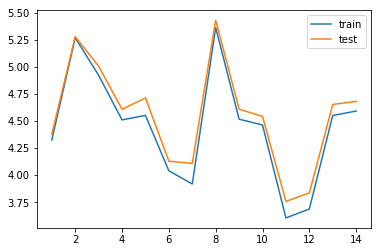

In [22]:
# On cherche les parametres optimaux 
# on fait varier le nombre d'arbre dans la forêt..
curves = []
for n_estimators in range(1,15) :
    

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = n_estimators, max_depth=10 )
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    print("n_estimators",n_estimators, "erreur",err_train ,err_test)
    curves.append((n_estimators,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on garde la valeur par défaut n_estimators=10

max_depth 1 erreur 6.64777232307 6.56189738693
max_depth 2 erreur 6.64777232307 6.56189738693
max_depth 3 erreur 6.64167669683 6.5573430415
max_depth 4 erreur 6.55275385158 6.47283438481
max_depth 5 erreur 6.49516470502 6.41442220037
max_depth 6 erreur 6.03161239687 6.02073786479
max_depth 7 erreur 6.09641456191 6.06051769871
max_depth 8 erreur 6.37872424449 6.30293681726
max_depth 9 erreur 4.93012826392 4.99679682728
max_depth 10 erreur 4.65432112199 4.76402927733
max_depth 11 erreur 3.27016059458 3.58583727745
max_depth 12 erreur 3.50477799484 3.84414616652
max_depth 13 erreur 2.10917697482 2.75275110397
max_depth 14 erreur 1.74665320648 2.57398572344
max_depth 15 erreur 1.46847462605 2.51695502777
max_depth 16 erreur 0.964223540332 2.277524941
max_depth 17 erreur 0.969022576554 2.31279400297
max_depth 18 erreur 0.792518885012 2.24873249928
max_depth 19 erreur 0.735332995535 2.2367878835
max_depth 20 erreur 0.700953411227 2.24090289751
max_depth 21 erreur 0.637839667788 2.21708684106

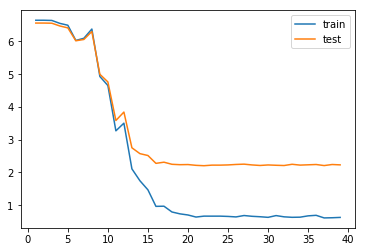

In [23]:
# on fait varier a profondeur maximale de l'arbre.
curves = []
for max_depth in range(1,40) :

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = 10, max_depth=max_depth)
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    print("max_depth",max_depth, "erreur",err_train ,err_test)
    curves.append((max_depth,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()  
# on choisit max_depth = 20

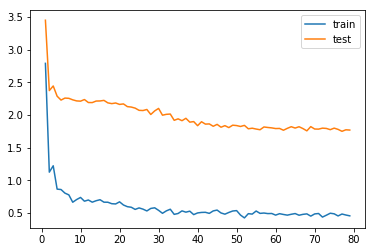

In [27]:
# on fait varier le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud.
curves = []
for max_features in range(1,80) :

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = 10, max_depth=20, max_features=max_features)
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    #print("max_features",max_features, "erreur",err_train ,err_test)
    curves.append((max_features,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()  
# on choisit max_depth = 70

In [17]:
%%time
# Le modèle final est le suivant :

# Etape 1 : définition des paramètres
RFC= RandomForestClassifier(n_estimators = 10, max_depth=20, max_features=70)

# Etape 2 : apprentissage
RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

# Etape 3 : prédiction
Y_pred_train = RFC.predict(X_train)
Y_pred_test  = RFC.predict(X_test)

# Etape 4 : evaluation  (on calcule l'erreur)

# on calcule l'erreur (RMSE)
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print("RMSE_train", err_train)
print("RMSE_test", err_test)

# R2
R2_train = RFC.score(X_train, Y_train)
R2_test = RFC.score(X_test, Y_test)
print("R2_train",R2_train)
print("R2_test",R2_test)

RMSE_train 0.475596784886
RMSE_test 1.786753084
R2_train 0.980179420334
R2_test 0.664669051878
Wall time: 3.87 s


A présent, nous utilisons une méthode automatique de recherche des paramètres pour comparer les résultats.

In [ ]:
#outil grille de recherche
from sklearn.grid_search import GridSearchCV

#combinaisons de paramètres à tester : Scikit-learn va évaluer toutes les combinaisons
parametres = {"max_depth":[15,16,17,18,19,20,21,22,23,24,25],"max_features":[60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]}

#classifieur à utiliser – Random Forest
RFC= RandomForestClassifier()
#instanciation de la recherche
grille = GridSearchCV(estimator=RFC,param_grid=parametres)

#lancer l'exploration
resultats = grille.fit(X_train,Y_train["Mortality_cat"].ravel())
print(resultats.best_params_)
#prédiction avec le ‘’meilleur’’ modèle identifié
Y_pred_train = resultats.predict(X_train)
Y_pred_test = resultats.predict(X_test) 
#performances du ‘’meilleur’’ modèle : 
# RMSE
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print(err_train)
print(err_test)
# R2
R2_train = resultats.score(X_test, Y_test)
R2_test = resultats.score(X_test, Y_test)
print(R2_train)
print(R2_test)


 {'max_depth': 17, 'max_features': 77}

    RMSE_train 0.544134072891
    RMSE_test 1.75082398184
    R2_train 0.965266063487
    R2_test 0.965266063487
   
les résultats avec cette méthode sont pas stable et moins bons

# Méthode Boosting : ici, nous allons voir l'algorithme de Gradient Boosting Machine (gbm) pour une classification.

# Gradient Bossting Machine Classification

GB construit un modèle additif; il permet l'optimisation de fonctions de pertes différentiables arbitraires. A chaque étape, n_classes_ les arbres de régression sont ajustés sur le gradient négatif de la fonction de perte de déviance binomiale ou multinomiale. La classification binaire est un cas particulier où un seul arbre de régression est induit.

In [16]:
# on crée des tranches pour la variables taux de mortalité
data['Mortality_rate'].describe()
data.sort_values(by=['Mortality_rate'], ascending=False)
data['Mortality_rate'].quantile([0,.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1])
data[data['Mortality_rate']==0].count() # il y a 13051 lignes avec des zéros sur 37264 au total => il y a 35.0230786% avec des zéros
 
# on crée 18 tranches
data['Mortality_cat'] = pd.qcut(data['Mortality_rate'] , q = [0,0.350230786,0.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1], 
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 
data.groupby(['Mortality_cat'])['Mortality_cat'].count()
print(data.groupby(['Mortality_cat'])['Mortality_rate'].mean())

Mortality_cat
1       0.000000
2       0.104974
3       0.375507
4       0.855722
5       1.958020
6       4.333836
7       8.759500
8      15.763014
9      26.243081
10     41.913380
11     67.882232
12    113.848249
13    206.613198
14    302.866096
15    355.358866
16    434.428403
17    612.906082
18    938.472516
Name: Mortality_rate, dtype: float64


In [17]:
# variable à expliquer
Y= data["Mortality_cat"] 
type(Y)
Y2 = pd.DataFrame({'Mortality_cat':Y})

# variables explicatives
X= data[["Sex","Age_bucket","Year","Country", "SP.URB.TOTL.IN.ZS","SP.URB.GROW","SP.POP.GROW","SE.PRM.DURS",
"AG.SRF.TOTL.K2","SE.PRE.DURS","EN.POP.DNST","SE.SEC.DURS","SP.DYN.CBRT.IN","SP.DYN.CDRT.IN",
"NY.ADJ.AEDU.GN.ZS", "SP.DYN.TFRT.IN", "SP.ADO.TFRT", "SP.DYN.LE00.FE.IN", "SP.DYN.LE00.IN",
"SP.POP.DPND","SP.DYN.AMRT.FE","SP.DYN.AMRT.MA","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE",
"AG.LND.AGRI.K2", "EN.ATM.GHGO.KT.CE","AG.LND.AGRI.ZS","AG.PRD.FOOD.XD","IT.CEL.SETS",
"AG.PRD.LVSK.XD","AG.PRD.CROP.XD","IT.MLT.MAIN","EN.ATM.GHGT.KT.CE","EN.ATM.CO2E.GF.ZS",
"EN.ATM.CO2E.LF.ZS","EN.ATM.CO2E.SF.ZS","NY.GDP.FRST.RT.ZS","NY.GDP.MINR.RT.ZS","EN.ATM.CO2E.LF.KT",
"EN.ATM.METH.AG.KT.CE","EN.ATM.METH.EG.KT.CE","EN.ATM.NOXE.AG.KT.CE", "EN.ATM.NOXE.EG.KT.CE",
"NY.GDP.TOTL.RT.ZS", "EN.ATM.CO2E.KT","EN.ATM.CO2E.PC","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD"]] 

# On transforme les variables sous forme de chaînes de caractères en variables binaires :
# Ici, seul la variable country est concernée
X2 = X.T.to_dict().values()
from sklearn.feature_extraction import DictVectorizer
prep = DictVectorizer()
X3 = prep.fit_transform(X2).toarray()

# on constitut nos deux échantillons "train" et "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y2, test_size=0.3)

In [33]:
#importation de la classe GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Etape 1 : définition des paramètres
GB = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,subsample=1.0)

# Etape 2 : apprentissage
GB = GB.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner 12 min

# Etape 3 : prédiction
Y_pred_train = GB.predict(X_train)
Y_pred_test = GB.predict(X_test)

# Etape 4 : evaluation  (on calcule l'erreur)

# on calcule l'erreur (RMSE)
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print(err_train)
print(err_test)

# R2
R2_train = GB.score(X_train, Y_train)
R2_test = GB.score(X_test, Y_test)
print(R2_train)
print(R2_test)

1.67401640698
1.79067850744
0.693911976691
0.607602862254


On pourrait certainement trouver de meilleurs résultats en testant d'autres paramètres, mais le temps de traitement est très long juste pour un seul algorithme. Je n'ai pas creusé cette piste.